In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime as dt

## Read Data

In [3]:
df = pd.read_csv("../Data/train.csv")
df["sample_id"] = df.index
df = df[['sample_id', 'genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family', 'media_duration',
       'listen_type', 'user_gender', 'user_id', 'artist_id', 'user_age', 'is_listened']]
df.head()

,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


#### Dimension of dataset

In [4]:
df.shape

(7558834, 16)

#### Column names

In [5]:
df.columns

Index(['sample_id', 'genre_id', 'ts_listen', 'media_id', 'album_id',
       'context_type', 'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id', 'artist_id',
       'user_age', 'is_listened'],
      dtype='object')

#### NaN

In [6]:
df.isna().sum()

sample_id          0
genre_id           0
ts_listen          0
media_id           0
album_id           0
context_type       0
release_date       0
platform_name      0
platform_family    0
media_duration     0
listen_type        0
user_gender        0
user_id            0
artist_id          0
user_age           0
is_listened        0
dtype: int64

#### Data types

In [7]:
df.dtypes

sample_id          int64
genre_id           int64
ts_listen          int64
media_id           int64
album_id           int64
context_type       int64
release_date       int64
platform_name      int64
platform_family    int64
media_duration     int64
listen_type        int64
user_gender        int64
user_id            int64
artist_id          int64
user_age           int64
is_listened        int64
dtype: object

#### Create subsample

#### Unique values per column

In [9]:
df.nunique()

sample_id          3007
genre_id             47
ts_listen          3004
media_id            552
album_id            257
context_type         31
release_date        175
platform_name         3
platform_family       3
media_duration      242
listen_type           2
user_gender           2
user_id             178
artist_id           263
user_age             13
is_listened           2
dtype: int64

#### Descriptive statistics

In [21]:
df.describe()

,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,...,user_age,is_listened,listen_month,listen_week,listen_weekday,listen_hour,release_month,release_week,release_weekday,release_hour
count,3.007000e+03,3007.000000,3.007000e+03,3007.000000,3007.000000,3007.000000,3.007000e+03,3007.000000,3007.000000,3007.000000,...,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.0,3007.000000,3007.000000,3007.000000
mean,3.746516e+06,7135.722647,1.479254e+09,268341.162621,45552.688394,2.689724,2.004799e+07,0.499169,0.428334,257.182241,...,24.250748,0.672431,11.005321,45.805454,2.816428,13.529431,8.0,33.998005,3.788826,7.918856
std,1.910487e+06,11525.516941,7.749981e+05,47313.568053,4126.432579,5.115028,3.882135e+04,0.807431,0.687379,74.353425,...,3.624459,0.469405,0.169060,1.326227,1.849338,5.647765,0.0,0.044632,0.444866,4.874070
min,5.445900e+04,1.000000,1.477325e+09,200226.000000,40015.000000,0.000000,1.953100e+07,0.000000,0.000000,26.000000,...,18.000000,0.000000,10.000000,43.000000,0.000000,0.000000,8.0,33.000000,1.000000,0.000000
25%,2.085688e+06,3.000000,1.478588e+09,228670.000000,42218.000000,0.000000,2.004070e+07,0.000000,0.000000,209.000000,...,21.000000,0.000000,11.000000,45.000000,1.000000,10.000000,8.0,34.000000,4.000000,6.000000
50%,4.227035e+06,14.000000,1.479281e+09,256178.000000,44476.000000,1.000000,2.006101e+07,0.000000,0.000000,249.000000,...,24.000000,1.000000,11.000000,46.000000,3.000000,14.000000,8.0,34.000000,4.000000,9.000000
75%,5.313556e+06,25471.000000,1.479935e+09,312108.000000,49068.000000,2.000000,2.007051e+07,1.000000,1.000000,299.500000,...,27.000000,1.000000,11.000000,47.000000,4.000000,18.000000,8.0,34.000000,4.000000,9.000000
max,7.530927e+06,26441.000000,1.480627e+09,365456.000000,54626.000000,47.000000,2.014082e+07,2.000000,2.000000,742.000000,...,30.000000,1.000000,12.000000,48.000000,6.000000,23.000000,8.0,34.000000,6.000000,23.000000


## Check for multicollinearity
#### Variance inflation factor
NOTE: VIF values above 10 indicates the presence of high multicolinearity. Usual approach would be to drop those variables. For values between 5-10 you should consider it as well.

In [10]:
X = df.drop(["is_listened"], axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF,features
0,1.27,sample_id
1,1.19,genre_id
2,-229.66,ts_listen
3,217.14,media_id
4,221.60,album_id
5,1.07,context_type
6,1.02,release_date
7,1.58,platform_name
8,1.55,platform_family
9,1.13,media_duration


In the following example, "album_id" is dropped and VIF of media_id was drastically reduced. "media_id" is one of the features which might be senseful to keep in the dataset.

In [68]:
X = df.drop(["is_listened", "album_id"], axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF,features
0,1.07,sample_id
1,1.15,genre_id
2,-228.27,ts_listen
3,1.17,media_id
4,1.07,context_type
5,1.01,release_date
6,1.58,platform_name
7,1.55,platform_family
8,1.13,media_duration
9,1.06,listen_type


## Heatmap: Show correlations between features

<AxesSubplot:>

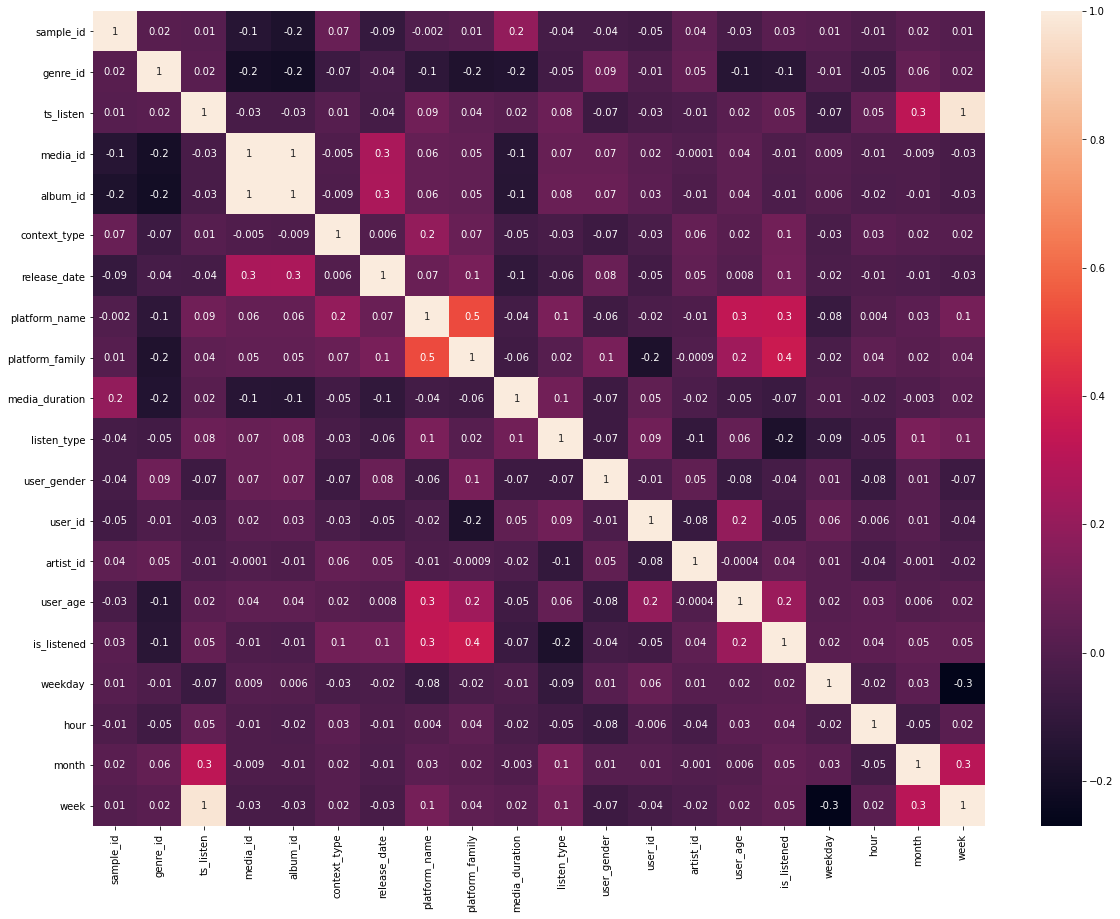

In [133]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(), annot=True, fmt=".1g")

## Create new features out of timestamps
#### for columns "ts_listen"

In [14]:
df["listen_dateTime"] = [dt.fromtimestamp(x) for x in df["ts_listen"]]
df["listen_month"] = df["listen_dateTime"].dt.month
df["listen_week"] = df["listen_dateTime"].dt.isocalendar().week
df["listen_weekday"] = df["listen_dateTime"].dt.weekday
df["listen_hour"] = df["listen_dateTime"].dt.hour

#### for column "release_date"

In [15]:
df["release_dateTime"] = [dt.fromtimestamp(x) for x in df["release_date"]]
df["release_month"] = df["release_dateTime"].dt.month
df["release_week"] = df["release_dateTime"].dt.isocalendar().week
df["release_weekday"] = df["release_dateTime"].dt.weekday
df["release_hour"] = df["release_dateTime"].dt.hour
df.head()

,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,...,listen_dateTime,listen_month,listen_week,listen_weekday,listen_hour,release_dateTime,release_month,release_week,release_weekday,release_hour
54459,54459,25551,1478605794,224953,41972,0,20040704,1,2,344,...,2016-11-08 12:49:54,11,45,1,12,1970-08-21 00:51:44,8,34,4,0
54462,54462,25551,1478175796,224953,41972,0,20040704,1,2,344,...,2016-11-03 13:23:16,11,44,3,13,1970-08-21 00:51:44,8,34,4,0
54533,54533,10,1478868990,269389,45518,12,20061016,2,1,213,...,2016-11-11 13:56:30,11,45,4,13,1970-08-21 06:30:16,8,34,4,6
54552,54552,10,1480379721,269389,45518,18,20061016,2,1,213,...,2016-11-29 01:35:21,11,48,1,1,1970-08-21 06:30:16,8,34,4,6
54615,54615,10,1480112968,297859,47488,1,20040101,0,0,358,...,2016-11-25 23:29:28,11,47,4,23,1970-08-21 00:41:41,8,34,4,0


#### visualize in heatmap

<AxesSubplot:>

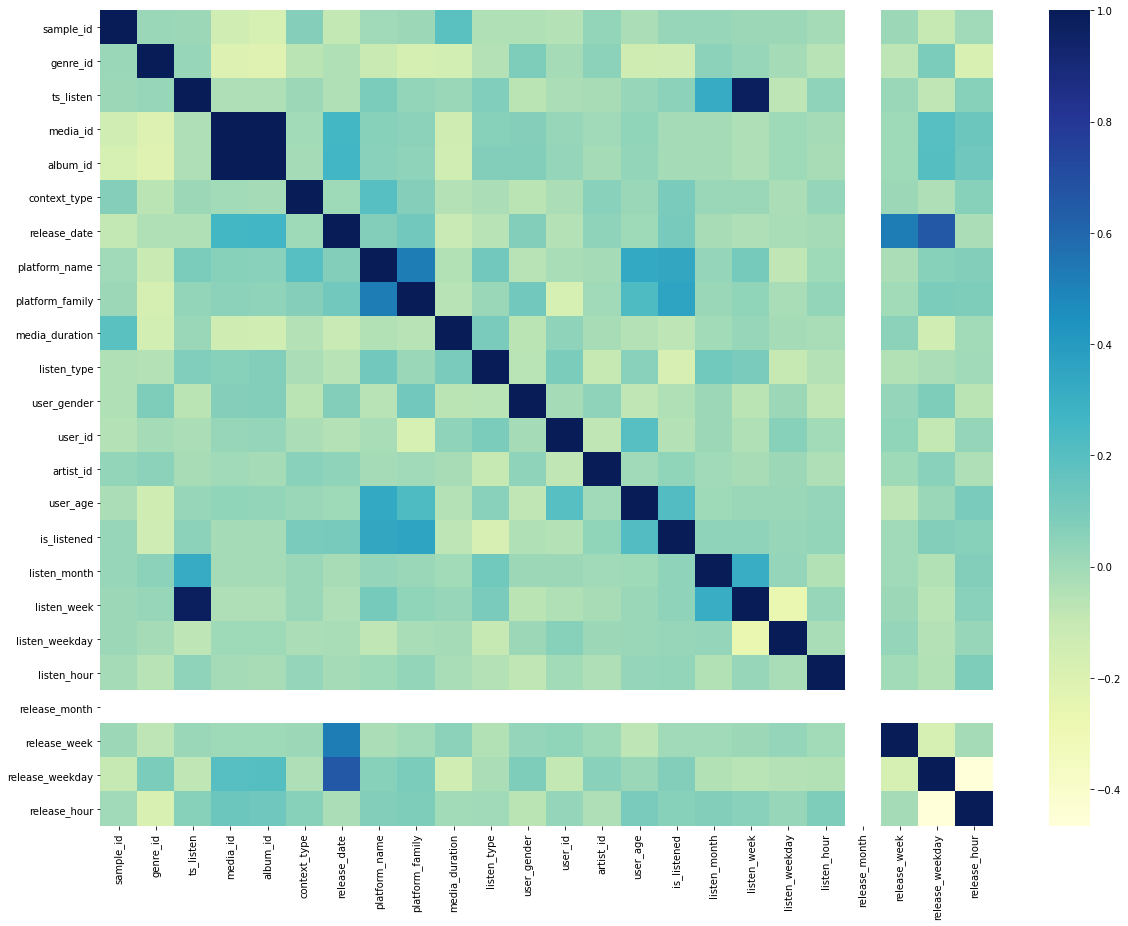

In [16]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(), annot=False, cmap="YlGnBu", fmt=".1g")

## Check for user age related ...

In [39]:
age_bins = [10, 15, 20, 25, 30, 35]
df["user_age_bin"] = pd.cut(df["user_age"], age_bins)
df.head()

,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,...,listen_week,listen_weekday,listen_hour,release_dateTime,release_month,release_week,release_weekday,release_hour,user_age_bins,user_age_bin
54459,54459,25551,1478605794,224953,41972,0,20040704,1,2,344,...,45,1,12,1970-08-21 00:51:44,8,34,4,0,20,"(15, 20]"
54462,54462,25551,1478175796,224953,41972,0,20040704,1,2,344,...,44,3,13,1970-08-21 00:51:44,8,34,4,0,20,"(15, 20]"
54533,54533,10,1478868990,269389,45518,12,20061016,2,1,213,...,45,4,13,1970-08-21 06:30:16,8,34,4,6,25,"(20, 25]"
54552,54552,10,1480379721,269389,45518,18,20061016,2,1,213,...,48,1,1,1970-08-21 06:30:16,8,34,4,6,29,"(25, 30]"
54615,54615,10,1480112968,297859,47488,1,20040101,0,0,358,...,47,4,23,1970-08-21 00:41:41,8,34,4,0,30,"(25, 30]"


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_age_bin', ylabel='count'>

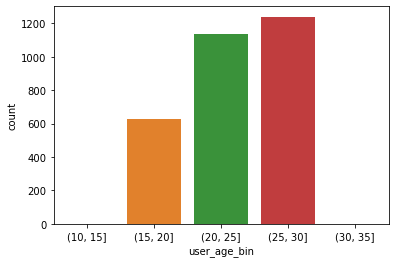

In [41]:
sns.countplot("user_age_bin", data=df)

In [47]:
df["user_age_bin"].unique

<bound method Series.unique of 54459      (15, 20]
54462      (15, 20]
54533      (20, 25]
54552      (25, 30]
54615      (25, 30]
             ...   
7499886    (20, 25]
7499896    (20, 25]
7499906    (20, 25]
7499914    (25, 30]
7530927    (15, 20]
Name: user_age_bin, Length: 3007, dtype: category
Categories (5, interval[int64]): [(10, 15] < (15, 20] < (20, 25] < (25, 30] < (30, 35]]>

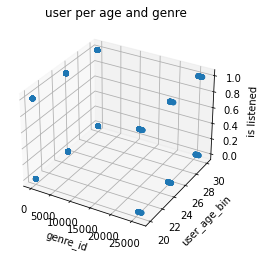

In [75]:
df["uab"] = df["user_age_bin"].astype(str)
df["uab"].replace({"(10, 15]":15, "(15, 20]":20 , "(20, 25]":25, 
                   "(25, 30]":30 , "(30, 35]":35}, inplace=True)

x = df["genre_id"]
y = df["uab"] 
z = df["is_listened"]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)    # plot the point (2,3,4) on the figure

# ax = plt.axes(projection="3d")
# ax.plot_surface(x,y,z, cmap ='viridis', edgecolor ='green')

# ax = fig.gca(projection = '3d')
# ax.bar3d(x,y,z)

ax.set_title("user per age and genre")
ax.set_xlabel("genre_id")
ax.set_ylabel("user_age_bin")
ax.set_zlabel("is listened")
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
# ax.set_zticks([5,15,25,35])
# ax.grid(False)

# scat_plot = ax.scatter(xs=x, ys=y, zs=z, c=df["is_listened"])
# cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks([0,1])
# cb.set_ticklabels(["not listened", "listened"])

plt.show()

## Save preprocessed data

In [19]:
df.to_csv("../Data/df_train_preprocessed.csv", index=False)

# Just playing around 
# Not really good so far to gain further knowledge... But might be adapted to whatever might be interesting...

## Data Visualization

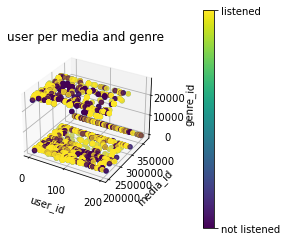

In [37]:
x = df["user_id"]
y = df["media_id"]
z = df["genre_id"]
# z = df["is_listened"]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)    # plot the point (2,3,4) on the figure

ax.set_title("user per media and genre")
ax.set_xlabel("user_id")
ax.set_ylabel("media_id")
ax.set_zlabel("genre_id")
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
# ax.set_zticks([5,15,25,35])
# ax.grid(False)

# scat_plot = ax.scatter(xs=x, ys=y, zs=z, c=df["is_listened"])
# cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks([0,1])
# cb.set_ticklabels(["not listened", "listened"])


# "user_id", "media_id", hue="is_listened"

plt.show()

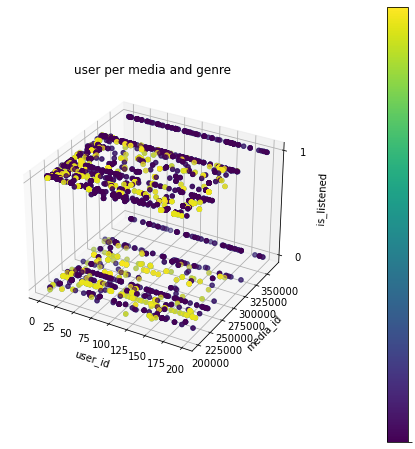

In [69]:
x = df["user_id"]
y = df["media_id"]
# z = df["genre_id"]
z = df["is_listened"]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)    # plot the point (2,3,4) on the figure

ax.set_title("user per media and genre")
ax.set_xlabel("user_id")
ax.set_ylabel("media_id")
ax.set_zlabel("is_listened")
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
ax.set_zticks([0,1])
# ax.grid(False)

scat_plot = ax.scatter(xs=x, ys=y, zs=z, c=df["genre_id"])
cb = plt.colorbar(scat_plot, pad=0.2)
cb.set_ticks([0,1])
cb.set_ticklabels(["genre"])


# "user_id", "media_id", hue="is_listened"

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_id', ylabel='media_id'>

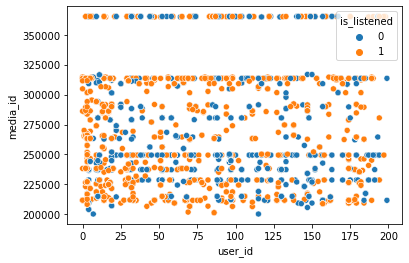

In [33]:
sns.scatterplot("user_id", "media_id", hue="is_listened", data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_id', ylabel='media_id'>

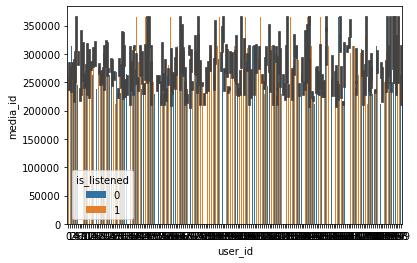

In [49]:
sns.barplot("user_id", "media_id", hue="is_listened", data=df)

<AxesSubplot:>

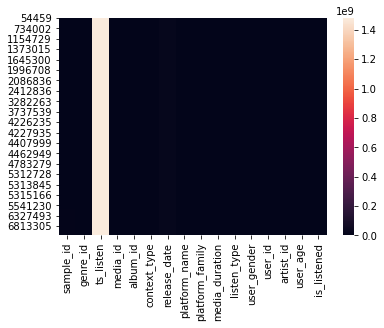

In [57]:
sns.heatmap(df)

(<Figure size 432x288 with 3 Axes>,
 {('1', '25551'): (0.0, 0.0, 0.669085566513955, 0.012435464228743932),
  ('1', '10'): (0.0,
   0.015325637639148558,
   0.669085566513955,
   0.03130306512752783),
  ('1', '13'): (0.0,
   0.04951887617708101,
   0.669085566513955,
   0.022298073789471882),
  ('1', '7'): (0.0,
   0.07470712337695751,
   0.669085566513955,
   0.054458757139671694),
  ('1', '25781'): (0.0,
   0.13205605392703385,
   0.669085566513955,
   0.01286427334007994),
  ('1', '2'): (0.0,
   0.14781050067751839,
   0.669085566513955,
   0.2092588463319669),
  ('1', '19'): (0.0,
   0.35995952041988993,
   0.669085566513955,
   0.00857618222671993),
  ('1', '3'): (0.0,
   0.37142587605701444,
   0.669085566513955,
   0.050170666026311726),
  ('1', '25471'): (0.0,
   0.4244867154937308,
   0.669085566513955,
   0.04373852935627173),
  ('1', '14'): (0.0,
   0.4711154182604072,
   0.669085566513955,
   0.09262276804857551),
  ('1', '8'): (0.0,
   0.5666283597193873,
   0.6690855665139

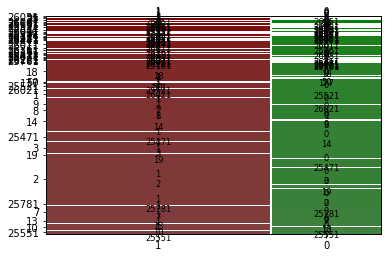

In [53]:
mosaic(df, ["is_listened", "genre_id"])